<a href="https://colab.research.google.com/github/reihannudin24/Machine-Learning-Study-/blob/Learning_Demo_G_Colabs/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libary** yang dibutuhkan seperti
*Numpy, Pandas, Matplotlib dan sklearn* dan membaca data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Will get california housing_test.csv
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Setelahnya kita diharuskan untuk melakukan explorasi data seperti :

1.   **Cek Nilai Null**
2.   **Cek Duplikasi**
3.   **Cek Data Outlier**
4.   **Cek Tipe Data**
5.   **Cek Distribusi Data**
6.   **Cek Korelasi Antar Kolom**

In [5]:
# Cek Null
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [6]:
# Check Duplikat
df.duplicated().sum()

0

Text(0.5, 1.0, 'Outliers pada kolom longitude')

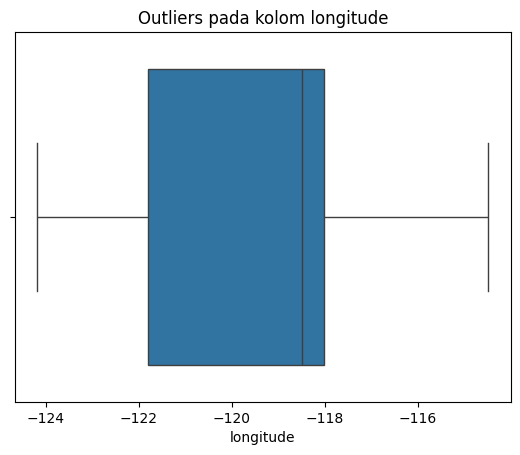

In [15]:
import seaborn as sns

# Check outlier
sns.boxplot(x=df['longitude'])
plt.title(f"Outliers pada kolom longitude")

In [8]:
# Check tipe data
print(df.dtypes)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [4]:
nums_cols = df.select_dtypes(include=[np.number]).columns
for col in nums_cols:
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribusi data pada kolom {col}")
  plt.show()

NameError: name 'sns' is not defined

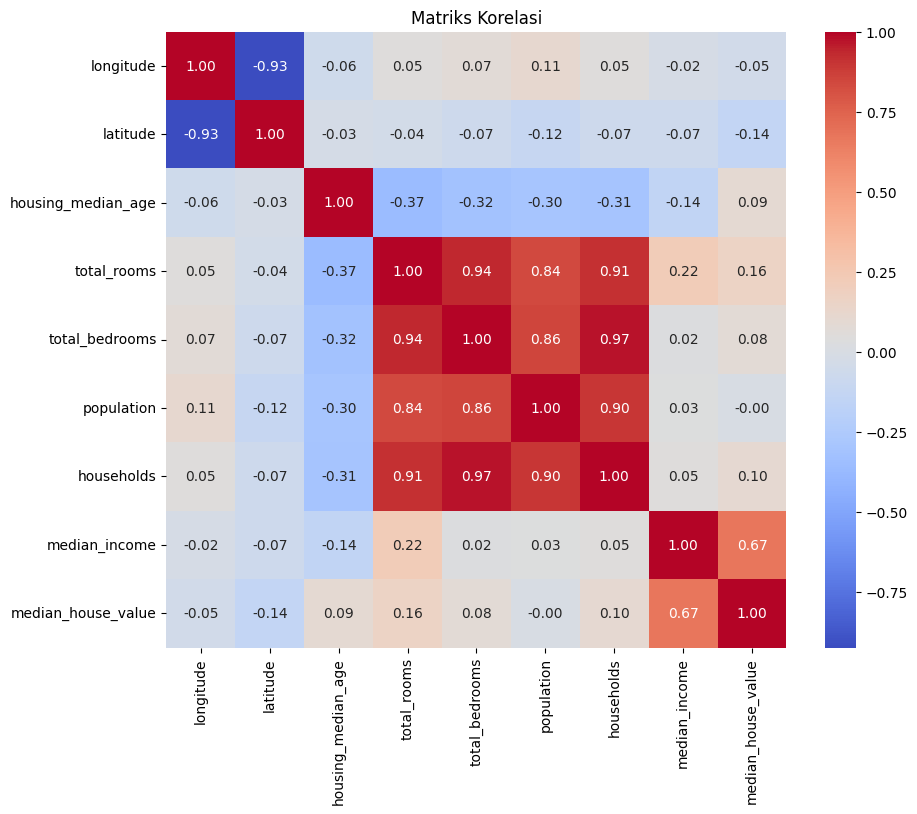

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()

In [5]:
# Menghitung korelasi antar smeua kolom
correlation_matrix = df.corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925017           -0.064203     0.049865   
latitude            -0.925017  1.000000           -0.025143    -0.039632   
housing_median_age  -0.064203 -0.025143            1.000000    -0.367850   
total_rooms          0.049865 -0.039632           -0.367850     1.000000   
total_bedrooms       0.070869 -0.068245           -0.323154     0.937749   
population           0.111572 -0.117318           -0.299888     0.838867   
households           0.051062 -0.068296           -0.305171     0.914116   
median_income       -0.018701 -0.072363           -0.144315     0.221249   
median_house_value  -0.050662 -0.138428            0.091409     0.160427   

                    total_bedrooms  population  households  median_income  \
longitude                 0.070869    0.111572    0.051062      -0.018701   
latitude                 -0.068245   -0.117318   -0.068296      -0.072363   
housing_

Disini kita diperlukan untuk memisahkan antara ** variabel pendukung ** dan **target**



In [6]:
corelation_xy = df['longitude'].corr(df['median_house_value'])

print("Korelasi longitude dengan median_house_value:", corelation_xy)

Korelasi longitude dengan median_house_value: -0.05066218983804367


In [7]:
# Pilih fitur dengan korelasi kuat dan beberapa fitur tambahan yang mungkin relevan
X_target = df[['longitude', 'latitude', 'median_income', 'total_rooms', 'households', 'housing_median_age']]
y_target = df['median_house_value']


In [8]:
X_target.head()

,longitude,latitude,median_income,total_rooms,households,housing_median_age
0,-122.05,37.37,6.6085,3885.0,606.0,27.0
1,-118.30,34.26,3.5990,1510.0,277.0,43.0
2,-117.81,33.78,5.7934,3589.0,495.0,27.0
3,-118.36,33.82,6.1359,67.0,11.0,28.0
4,-119.67,36.33,2.9375,1241.0,237.0,19.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_target, y_target, test_size=0.2 , random_state=42)

In [11]:
# Cetak hasil pembagian data
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 2400
Jumlah data testing: 600


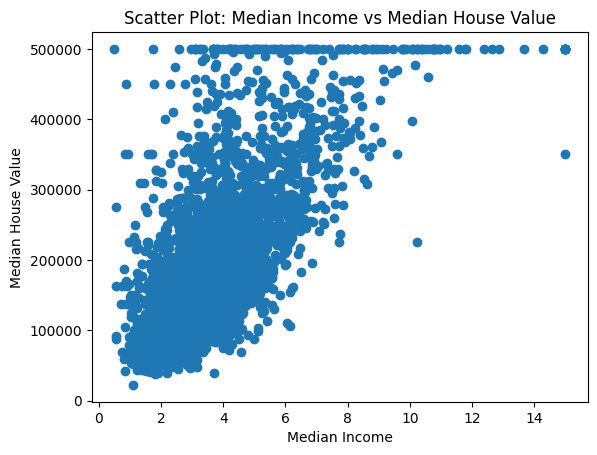

In [12]:
plt.scatter(df['median_income'], df['median_house_value'])
plt.title("Scatter Plot: Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


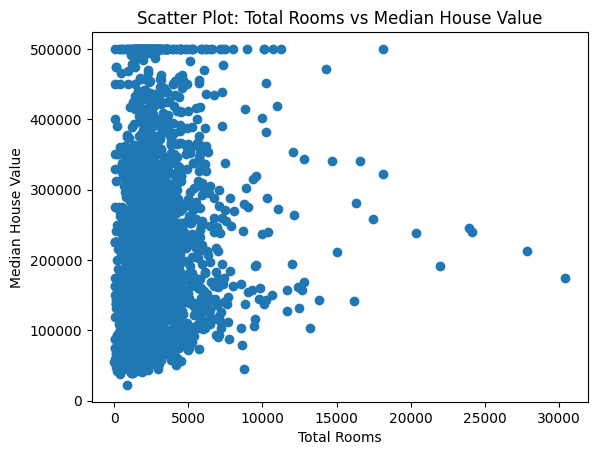

In [13]:
plt.scatter(df['total_rooms'], df['median_house_value'])
plt.title("Scatter Plot: Total Rooms vs Median House Value")
plt.xlabel("Total Rooms")
plt.ylabel("Median House Value")
plt.show()


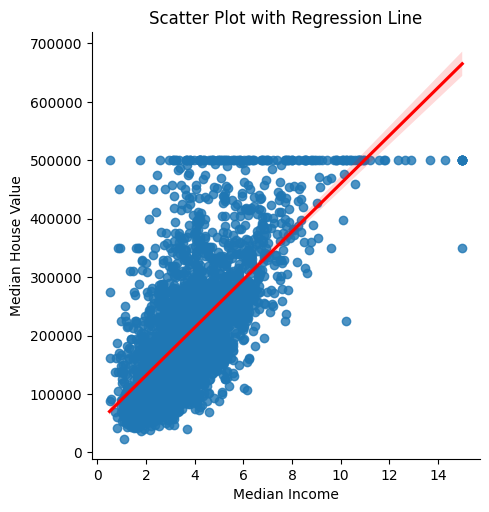

In [16]:
# Scatter plot dengan garis regresi
sns.lmplot(x='median_income', y='median_house_value', data=df, line_kws={'color': 'red'})
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

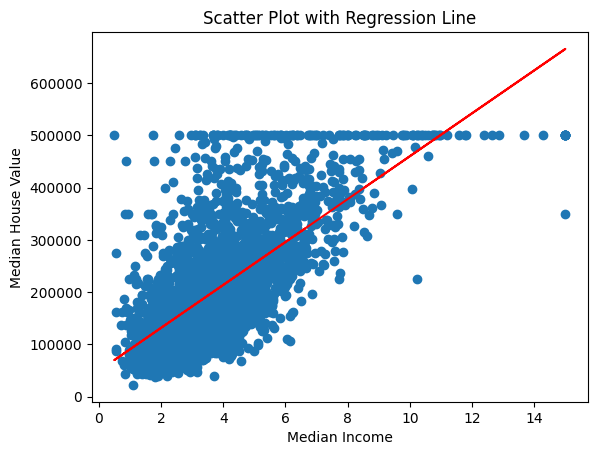

In [17]:
import numpy as np

# Hitung garis regresi
x = df['median_income']
y = df['median_house_value']
m, b = np.polyfit(x, y, 1)  # m = slope, b = intercept

# Plot scatter dan garis regresi
plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')  # Garis regresi
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [19]:
# Model Regression Linear
model = LinearRegression()
model.fit(X_target, y_target)
y_pred = model.predict(X_target)

In [20]:
y_pred

array([346157.90951446, 210594.48858736, 277365.14225199, ...,
        93945.56662873, 141929.67192672, 448391.6055921 ])

In [21]:
comparison = pd.DataFrame({
    'Actual': y_target,  # Data asli
    'Predicted': y_pred.flatten()  # Prediksi model
})

print(comparison.head())  # Menampilkan perbandingan


     Actual      Predicted
0  344700.0  346157.909514
1  176500.0  210594.488587
2  270500.0  277365.142252
3  330000.0  302069.085935
4   81700.0  127209.156736


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_target, y_pred)
r2 = r2_score(y_target, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 5272603780.791864
R-squared (R²): 0.5878137192911919


**MSE**: Mengukur error rata-rata kuadrat (semakin kecil, semakin baik).

**R²**: Menjelaskan seberapa baik model mampu menjelaskan variabilitas data target (semakin mendekati 1, semakin baik).


Result yang di hasilkan memang jauh dari data aktual, untuk meningkatkan value kita bisa lakukan standarisasi/normalisasi data:

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_target_scaled = scaler.fit_transform(X_target)

In [24]:
X_target_scaled = pd.DataFrame(X_target_scaled, columns=X_target.columns)

In [25]:
X_target_scaled

,longitude,latitude,median_income,total_rooms,households,housing_median_age
0,-1.233729,0.814633,1.510745,0.596418,0.317734,-0.147000
1,0.646344,-0.645931,-0.112324,-0.505550,-0.582743,1.127565
2,0.892007,-0.871356,1.071149,0.459078,0.013926,-0.147000
3,0.616263,-0.852570,1.255865,-1.175083,-1.310788,-0.067340
4,-0.040509,0.326213,-0.469081,-0.630362,-0.692223,-0.784282
...,...,...,...,...,...,...
2995,-0.135766,-0.570789,-1.417467,-0.533389,0.320471,-0.465641
2996,0.726560,-0.739858,-0.224718,1.233008,1.494650,-0.147000
2997,-0.055550,0.312124,-0.818558,-0.762599,-0.738753,-1.501225
2998,1.237940,-0.721072,-0.289327,-1.161627,-1.302577,0.888584


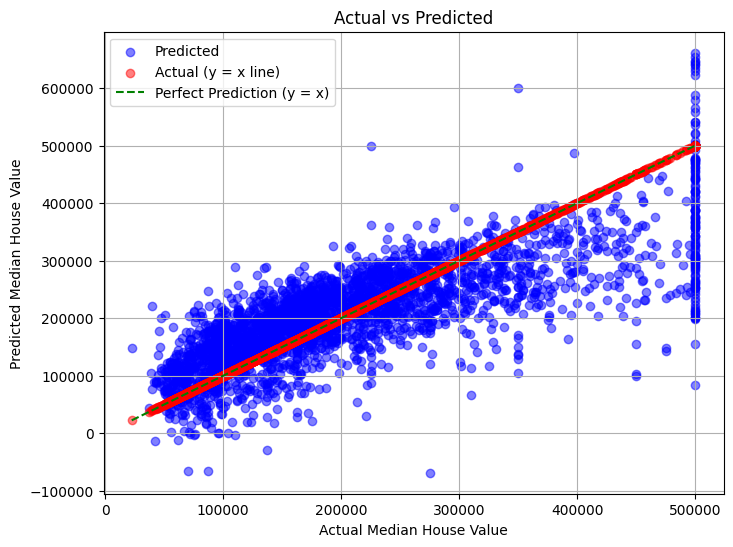

In [26]:
# Scatter plot dengan warna berbeda
plt.figure(figsize=(8, 6))
plt.scatter(y_target, y_pred, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_target, y_target, color='red', alpha=0.5, label='Actual (y = x line)')
plt.plot([min(y_target.values), max(y_target.values)], [min(y_target.values), max(y_target.values)], color='green', linestyle='--', label='Perfect Prediction (y = x)')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.legend()
plt.grid()
plt.show()


In [27]:
model = LinearRegression()
model.fit(X_target_scaled, y_target)

y_pred_scaled = model.predict(X_target_scaled)

In [28]:
# Calculate MSE and R-squared
mse_scaled = mean_squared_error(y_target, y_pred_scaled)
r2_scaled = r2_score(y_target, y_pred_scaled)

print(f"Mean Squared Error (MSE) scaled: {mse_scaled}")
print(f"R-squared (R²) scaled: {r2_scaled}")

Mean Squared Error (MSE) scaled: 5272603780.791863
R-squared (R²) scaled: 0.5878137192911921


## Uji Model Lain
Linear Regression bekerja baik jika hubungan antara variabel input (X) dan target (y) bersifat linear. Jika hubungan tidak linear, kamu bisa mencoba model lain seperti:


## Random Forest:



In [36]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_target, y_target.values.ravel())

RandomForestRegressor(random_state=42)

In [37]:
# Predict
y_pred_rf = rf_model.predict(X_target)

# Evaluate
mse_rf = mean_squared_error(y_target, y_pred_rf)
r2_rf = r2_score(y_target, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest MSE: 483567301.5832233
Random Forest R²: 0.9621970821630659


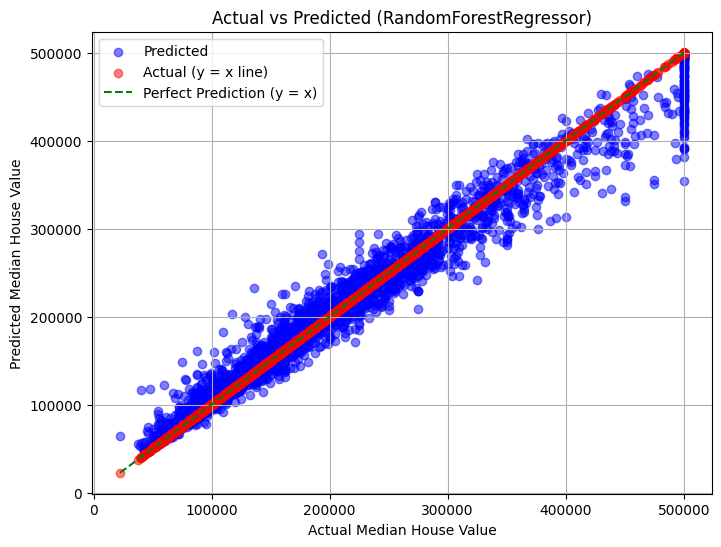

In [38]:
# Scatter plot dengan warna berbeda
plt.figure(figsize=(8, 6))
plt.scatter(y_target, y_pred_rf, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_target, y_target, color='red', alpha=0.5, label='Actual (y = x line)')
plt.plot([min(y_target.values), max(y_target.values)], [min(y_target.values), max(y_target.values)], color='green', linestyle='--', label='Perfect Prediction (y = x)')
plt.title("Actual vs Predicted (RandomForestRegressor)")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.legend()
plt.grid()
plt.show()


Hasil Prediksi mencapi 96% akan tetapi MSE yang kita dapatin masih sekitar 45%
untuk membuat MSE kita lebih kecil kita dapat menggunakan hyperparametr tuning
